In [39]:
from vedo import *
import random
from matplotlib import colormaps
from vedo.colors import colors
from operator import itemgetter
import os
from vtk.util import numpy_support
import os, tempfile
import vtk
import vedo.vtkclasses as vtki
import pandas as pd
import io
import re

In [55]:



def obj_file_to_numpy(fname):
        _v_list = []
        _vt_list = []
        _f_list = []
        with open(fname) as infile:    
                    
            for line in infile:
                line = line.lower()
                if line.startswith('vt'):
                    _arr = line[2:].split()
                    _arr = np.array([float(a) for a in _arr])                    
                    _vt_list.append(_arr)
                    #print(_arr)
                elif line[0] == 'v':
                    _arr = line[2:].split()
                    _arr = np.array([float(a) for a in _arr])                    
                    _v_list.append(_arr)
                    #print(_arr)
                elif line[0] == 'f':
                    #_arr = line[2:].split(" /")
                    _arr = re.split(" |/", line[2:-1])
                    _arr = np.array([int(a) for a in _arr])                    
                    _f_list.append(_arr)



        inputobj = []
        inputobj.append(np.array(_v_list))
        inputobj.append(np.array(_vt_list))
        inputobj.append(np.array(_f_list))
        return inputobj


def load_mesh_from_numpy(_v_list, _vt_list,_f_list ):
    _obj_str = ''

    for _pc in _v_list:
        _obj_str += 'v '
        _obj_str += ' '.join([str(a) for a in _pc])
        _obj_str += '\n'

    for _pc in _vt_list:
        _obj_str += 'vt '
        for _idx in range(len(_pc)-1):
            print(_p)
            _obj_str += _pc[_idx]+"/"+_pc[_idx+1]
            _obj_str += " "
        _obj_str += '\n'

    for _con in _f_list:
        _obj_str += 'f '
        _obj_str += ' '.join([str(a) for a in _con])
        _obj_str += '\n'


    tmp = tempfile.NamedTemporaryFile(delete=False, suffix='.obj')
    try:
        #print(tmp.name)
        tmp.write(_obj_str.encode())
    finally:
        tmp.close()
        
    _v = Mesh(tmp.name)
    os.unlink(tmp.name)    
    return _v




vol_index = 9
_dir = f'temp/vase/1/fractured_{vol_index}'
box_obj_list = []

for slice_index in range(20):
    print(slice_index)
    fname = f'{_dir}/piece_{slice_index}.obj'
    try:
        bb = Mesh(fname).box()
    except:
        break
    tmp = tempfile.NamedTemporaryFile(delete=False, suffix='box.obj')
    try:
        #print(tmp.name)
        bb.write(tmp.name)
    finally:
        tmp.close()
    
    box_obj = obj_file_to_numpy(tmp.name)
    #print(box_obj[0].shape)
    #print(box_obj[1].shape)
    #print(box_obj[2].shape)
    os.unlink(tmp.name)  
    box_obj_list.append(box_obj)

#for slice_index in range(20):
#    print(box_obj_list[slice_index][0].shape, box_obj_list[slice_index][1].shape, box_obj_list[slice_index][2].shape)
for i in range(len(box_obj_list),20):
    
    pad_data = []
    pad_data.append(np.zeros_like(box_obj_list[0][0], dtype=np.float32))
    pad_data.append(np.zeros_like(box_obj_list[0][1], dtype=np.float32))
    pad_data.append(np.zeros_like(box_obj_list[0][2], dtype=np.float32))
    box_obj_list.append(pad_data)

print('-----------------------------')
#box_obj_list_padded = _pad_data(np.stack(box_obj_list, axis=0)).astype(np.float32)

for slice_index in range(20):
    print(box_obj_list[slice_index][0].shape, box_obj_list[slice_index][1].shape, box_obj_list[slice_index][2].shape)

    
ref_mesh_obj = myutil.load_mesh_from_numpy(*bounding_boxes[np.where(ref_part)[0].item()])
normal_vector = myutil.compute_normal_vector_from_boundingbox(ref_mesh_obj)
#mesh_objs = []
#for box_obj in box_obj_list:
#    mesh_objs.append( load_mesh_from_numpy(*box_obj))




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
-----------------------------
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)
(24, 3) (24, 3) (6, 8)


In [52]:
_pc = ['1', '1', '2', '2', '4', '4', '3', '3']
_s = ''
for _idx in range(len(_pc)-1):
    print(_p)
    _s += _pc[_idx]+"/"+_pc[_idx+1]
    _s += " "

_s

3
3
3
3
3
3
3


'1/1 1/2 2/2 2/4 4/4 4/3 3/3 '

In [54]:
box_obj_list[0][2]

array([[ 1,  1,  2,  2,  4,  4,  3,  3],
       [ 5,  5,  7,  7,  8,  8,  6,  6],
       [ 9,  9, 11, 11, 12, 12, 10, 10],
       [13, 13, 14, 14, 16, 16, 15, 15],
       [17, 17, 19, 19, 20, 20, 18, 18],
       [21, 21, 22, 22, 24, 24, 23, 23]])

In [25]:
np.stack(box_obj_list, axis=0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.


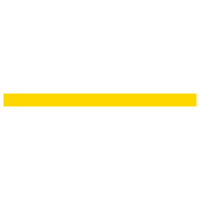

In [13]:
mesh_objs[9]

In [19]:
def _normalize(_vol):
    _data = _vol.dataset.GetPoints().GetData()
    _data_np = numpy_support.vtk_to_numpy(_data)
    _data_np = _data_np / np.max(_data_np, axis=0)
    #return numpy_support.numpy_to_vtk(_data_np)
    _vol.dataset.GetPoints().SetData(numpy_support.numpy_to_vtk(_data_np))
    #return _vol


In [20]:


   
sorted_colors1 = sorted(colors.items(), key=itemgetter(1))
_cmaps = []
for sc in sorted_colors1:
    # Get the color name
    cname = sc[0]
    # Skip the color if it doesn't end in a number
    if cname[-1] not in "123456789":
        continue
    _cmaps.append(cname)
#_cmaps = list(colors.keys())
#_cmaps = ['blue5']
settings.tiff_orientation_type = 4 

random.shuffle(_cmaps)


_vol = Volume(dataurl + 'vase.vti')
#_vol.dataset.GetPoints().SetData(_normalize(_vol.dataset.GetPoints().GetData()))



_vol_norm = _vol.clone().isosurface(4, flying_edges=False).pos(0,0,0).color('yellow5', 0.5)

_normalize(_vol_norm)
'''
_data = _vol_norm.dataset.GetPoints().GetData()
_data_np = numpy_support.vtk_to_numpy(_data)
_data_np = _data_np / np.max(_data_np, axis=0)
#print(np.max(_data_np, axis=0))
_vol_norm.dataset.GetPoints().SetData(numpy_support.numpy_to_vtk(_data_np))
'''
print( np.max(numpy_support.vtk_to_numpy(_vol_norm.dataset.GetPoints().GetData()), axis=0) )


num_of_slices = 20

#for vol_index in range(100):
for vol_index in range(10):
    _dir = f'temp/vase/0/fractured_{vol_index}'
    #_dir = f'/home/greenbaum-gpu/jhahn/data/shape_dataset/data/shape/vase/1/fractured_{vol_index}'
    print(_dir)
    #_dir = f'temp'

    os.makedirs(_dir, exist_ok=True)

    v = vector(random.random(),random.random(), random.random())
    p = vector(0, 0, 0)  # axis passes through this point


    _vol_norm_rotated = _vol_norm.clone().rotate(45, axis=v, point=p).pos(0,0,0).color('blue5', 0.5)

    #l = Line(-v+p, v+p).lw(3).c('red')


    num_of_slices = random.randint(10,20)

    [xmin,xmax, ymin,ymax, zmin,zmax] = _vol_norm_rotated.bounds()
    slice_tickness = (ymax-ymin)/num_of_slices
    slice_size = (xmax-xmin, slice_tickness, zmax-zmin)

    #_cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    slice_list = []

    slice_color_alpha = 0.8
    for slice_index in range(num_of_slices):
        
        #slice_index = 3
        _color = _cmaps[slice_index]
        #_color = 'red5'
        bottom_box = Box(pos=(xmin,ymin,zmin), size=((xmax-xmin)*2, (slice_index*slice_tickness)*2, (zmax-zmin)*2))
        #bottom_box.color('green5', 0.5)
        top_box = Box(pos=(xmin,ymax ,zmin), size=((xmax-xmin)*2, ( (num_of_slices-slice_index-1)*slice_tickness)*2, (zmax-zmin)*2))
        #top_box.color('red5', 0.5)
        
        if slice_index == 0:
            _vol_norm_rotated_slice = _vol_norm_rotated.clone().cut_with_mesh(top_box, invert=True).color(_color, slice_color_alpha)
        elif  slice_index == num_of_slices - 1:
            _vol_norm_rotated_slice = _vol_norm_rotated.clone().cut_with_mesh(bottom_box, invert=True).color(_color, slice_color_alpha)
        else:
            _vol_norm_rotated_slice = _vol_norm_rotated.clone().cut_with_mesh(top_box, invert=True).cut_with_mesh(bottom_box, invert=True).color(_color, slice_color_alpha)
        
        _vol_norm_rotated_slice.write(f'{_dir}/piece_{slice_index}.obj')
        #print( np.max(numpy_support.vtk_to_numpy(_vol_norm_rotated_slice.dataset.GetPoints().GetData()), axis=0) )
        slice_list.append(_vol_norm_rotated_slice)



        #if True:
        #    break
        

#show(slice_list, __doc__, axes=1)

[1. 1. 1.]
temp/vase/0/fractured_0
temp/vase/0/fractured_1
temp/vase/0/fractured_2
temp/vase/0/fractured_3
temp/vase/0/fractured_4
temp/vase/0/fractured_5
temp/vase/0/fractured_6
temp/vase/0/fractured_7
temp/vase/0/fractured_8
temp/vase/0/fractured_9


: 

In [163]:
Mesh(fname).GetPoints()

AttributeError: 'Mesh' object has no attribute 'GetPoints'

In [110]:
' '.join([str(a) for a in [0.44638664,0.15167218,0.48013178]])

'0.44638664 0.15167218 0.48013178'

In [60]:


_vtk_obj = numpy2vtk(_pcs,  name="OriginalMeshID")
_vtk_obj

_vtk_obj = Mesh(fname)
#_vtk_obj.box()
#_vtk_obj.compute_normals()
#_vtk_obj.GetOutput()
_vtk_obj
points=True
cells=True
feature_angle=None
consistency=True
pdnorm = vtki.new("PolyDataNormals")
pdnorm.SetInputData(_vtk_obj.dataset)
pdnorm.SetComputePointNormals(points)
pdnorm.SetComputeCellNormals(cells)
pdnorm.SetConsistency(consistency)
pdnorm.FlipNormalsOff()
if feature_angle:
    pdnorm.SetSplitting(True)
    pdnorm.SetFeatureAngle(feature_angle)
else:
    pdnorm.SetSplitting(False)
pdnorm.Update()
out = pdnorm.GetOutput()
out.GetPoints()

from vtk.util import numpy_support

src_points = numpy_support.vtk_to_numpy(out.GetPoints().GetData())
src_points
#obj_df = pd.read_csv(, header=None, delimiter=' ')
#pd = vtk.vtkmeshvtkPolyData()
##points = vtk.vtkPoints()
#points.SetData(_vtk_obj)
#pd.SetPoints(points)
#pd.box()
##mesh_list = load_obj(f'{_dir}/piece_{slice_index}.obj')
#mesh_list
#varr = numpy2vtk(mesh_list, dtype=np.float16, name="OriginalMeshID")


array([[0.44638664, 0.15167218, 0.48013178],
       [0.45047635, 0.14741483, 0.49208206],
       [0.44595307, 0.15167218, 0.48020229],
       ...,
       [0.61044461, 0.15167218, 0.83154154],
       [0.63148844, 0.15167218, 0.83238965],
       [0.67617702, 0.15167218, 0.82559037]], shape=(660, 3))


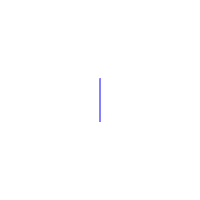

In [104]:
_vtk_obj_box = _vtk_obj.box()
_vtk_obj_box.compute_normals(cells=True)
#_vtk_obj_box.triangulate()
#_vtk_obj_box
mesh2 = _vtk_obj_box.extract_largest_region().color("b")
mesh2

area1 = 257047751.94103044
area2 = 160170568.1793692


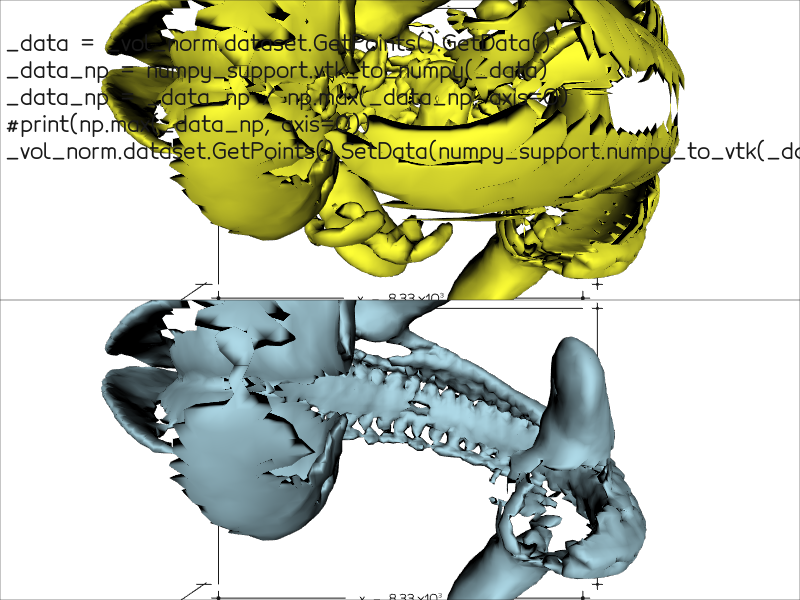

In [98]:
from vedo import dataurl, Volume, printc, Plotter

mesh1 = Volume(dataurl+"embryo.tif").isosurface(80).c("yellow")
printc("area1 =", mesh1.area(), c="yellow")

mesh2 = mesh1.extract_largest_region().color("lb")
printc("area2 =", mesh2.area(), c="lb")

plt = Plotter(shape=(2,1), axes=7)
plt.at(0).show(mesh1, __doc__)
plt.at(1).show(mesh2)

In [80]:
_data = _vtk_obj.box().dataset.GetPoints().GetData()
_data_np = numpy_support.vtk_to_numpy(_data)
#_vtk_obj.compute_normals()
print(_data_np)
print(_vtk_obj.box().pointdata['Normals'])

[[0.41072574 0.10401407 0.48010868]
 [0.41072574 0.10401407 0.8326586 ]
 [0.41072574 0.15167218 0.48010868]
 [0.41072574 0.15167218 0.8326586 ]
 [0.7034863  0.10401407 0.48010868]
 [0.7034863  0.10401407 0.8326586 ]
 [0.7034863  0.15167218 0.48010868]
 [0.7034863  0.15167218 0.8326586 ]
 [0.41072574 0.10401407 0.48010868]
 [0.41072574 0.10401407 0.8326586 ]
 [0.7034863  0.10401407 0.48010868]
 [0.7034863  0.10401407 0.8326586 ]
 [0.41072574 0.15167218 0.48010868]
 [0.41072574 0.15167218 0.8326586 ]
 [0.7034863  0.15167218 0.48010868]
 [0.7034863  0.15167218 0.8326586 ]
 [0.41072574 0.10401407 0.48010868]
 [0.7034863  0.10401407 0.48010868]
 [0.41072574 0.15167218 0.48010868]
 [0.7034863  0.15167218 0.48010868]
 [0.41072574 0.10401407 0.8326586 ]
 [0.7034863  0.10401407 0.8326586 ]
 [0.41072574 0.15167218 0.8326586 ]
 [0.7034863  0.15167218 0.8326586 ]]
[[-1.  0.  0.]
 [-1.  0.  0.]
 [-1.  0.  0.]
 [-1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0. -1.  0.]


In [67]:
_data = _vtk_obj.box().dataset.GetPoints().GetData()
_data_np = numpy_support.vtk_to_numpy(_data)
_data_np

array([[0.41072574, 0.10401407, 0.48010868],
       [0.41072574, 0.10401407, 0.8326586 ],
       [0.41072574, 0.15167218, 0.48010868],
       [0.41072574, 0.15167218, 0.8326586 ],
       [0.7034863 , 0.10401407, 0.48010868],
       [0.7034863 , 0.10401407, 0.8326586 ],
       [0.7034863 , 0.15167218, 0.48010868],
       [0.7034863 , 0.15167218, 0.8326586 ],
       [0.41072574, 0.10401407, 0.48010868],
       [0.41072574, 0.10401407, 0.8326586 ],
       [0.7034863 , 0.10401407, 0.48010868],
       [0.7034863 , 0.10401407, 0.8326586 ],
       [0.41072574, 0.15167218, 0.48010868],
       [0.41072574, 0.15167218, 0.8326586 ],
       [0.7034863 , 0.15167218, 0.48010868],
       [0.7034863 , 0.15167218, 0.8326586 ],
       [0.41072574, 0.10401407, 0.48010868],
       [0.7034863 , 0.10401407, 0.48010868],
       [0.41072574, 0.15167218, 0.48010868],
       [0.7034863 , 0.15167218, 0.48010868],
       [0.41072574, 0.10401407, 0.8326586 ],
       [0.7034863 , 0.10401407, 0.8326586 ],
       [0.

In [64]:
iter = vtk.vtkImagePointIterator(_vtk_obj.dataset.GetPoints())
while not iter.IsAtEnd():
    x, y, z = iter.GetPosition()
    #scalars.SetValue(iter.GetId(), x**2 + y**2 + z**2)
    print(x,y,z)
    iter.Next()

TypeError: arguments do not match any overloaded methods

In [74]:


def calculate_normal_vector_open3d(_pcs, dist_threshold=0.02, visualize=False):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(_pcs)
    plane_model, inliers = pcd.segment_plane(distance_threshold=dist_threshold,
                                             ransac_n=3,
                                             num_iterations=1000)
    [a, b, c, d] = plane_model    
    #plane_model = [0 for plane_model if a < 0.00005 ]
    return [a,b,c]
#calculate_normal_vector_open3d(_data_np)

[[ 0.05429671 -0.9345978  -0.35153812]
 [ 0.00620309 -0.926011   -0.3774457 ]
 [-0.05193322 -0.94622177 -0.31932324]
 ...
 [ 0.01866626 -0.86945254  0.4936639 ]
 [-0.08732693 -0.9117631   0.40132552]
 [ 0.20347247 -0.86007035  0.46784398]]


In [9]:
slice_index = 0
slice_list[slice_index].box().write(f'{_dir}/piece_box_{slice_index}.obj')

In [46]:
import vedo.vtkclasses as vtki 

norm = vtki.new("ImageNormalize")
norm.SetInputData(_vol_norm.dataset)
norm.Update()


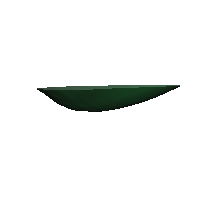

In [87]:
_vol_norm_rotated_slice

In [54]:
from vtk import vtkFloatArray





np.max(_data_np, axis=0)

array([1., 1., 1.], dtype=float32)

In [21]:
from pprint import pprint
import vtk
#from vtk.util.numpy_support import vtk_to_numpy

#pprint(dir(norm.GetOutput()))
#print(norm.GetOutput().GetPointData())
imgdata = norm.GetOutput()

# Get the dimensions of the image
dims = imgdata.GetDimensions()

# Iterate over the points in the image
for z in range(dims[2]):
    for y in range(dims[1]):
        for x in range(dims[0]):
            # Get the pixel value at (x, y, z)
            pixelValue = imgdata.GetScalarComponentAsFloat(x, y, z, 0)

            # Do something with the pixel value
            print(pixelValue)
#print(vtk_to_numpy(imgdata.GetPointData().GetScalars()))
iter = vtk.vtkImagePointIterator(imgdata)
while not iter.IsAtEnd():
    x, y, z = iter.GetPosition()
    #scalars.SetValue(iter.GetId(), x**2 + y**2 + z**2)
    print(x,y,z)
    iter.Next()

In [13]:
_vol_norm_rotated_slice.dataset.GetVerts().GetData()

<vtkmodules.vtkCommonCore.vtkIdTypeArray(0x000001D637A8EE40) at 0x000001D64E928D60>


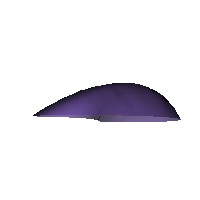

In [9]:
_vol_norm_rotated_slice.normalize()